<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Praxis_AML_sessions/blob/main/PCA_SVD_Session6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path_autompg = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
path_img = 'https://www.escapehimalaya.com/wp-content/uploads/2017/07/mountain-1209497_1920-1280x600.jpg'
path_img1 = 'https://www.blueridgemountains.com/images/mountain-bg-md.jpg'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
autompg = pd.read_csv(path_autompg, sep='\s+', header=None, na_values='?')

In [ ]:
autompg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = autompg.iloc[:,[0,2,3,4,5]]

In [ ]:
X.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled

array([[-0.69863841,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [-1.08349824,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [-0.69863841,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [ 1.09737414, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [ 0.5842277 , -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [ 0.96908753, -0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
km = KMeans(n_clusters=3, n_init=40, random_state=12345)

In [ ]:
clusters = km.fit_predict(X_scaled)

In [ ]:
pd.Series(clusters).value_counts()

2    148
1    147
0     97
dtype: int64

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca_output = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.78535088, 0.14240113])

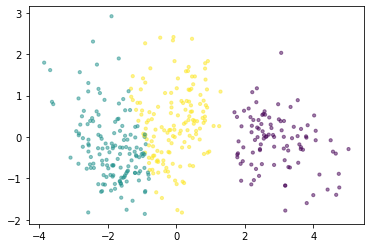

In [ ]:
plt.scatter(pca_output[:,0],pca_output[:,1],c=clusters,s=10, alpha=0.5)
plt.show()

In [ ]:
X.groupby(by=clusters).mean()

,0,2,3,4,5
0,14.528866,348.020619,161.804124,4143.969072,12.641237
1,31.615646,103.248299,72.850340,2189.809524,16.751701
2,21.175676,184.283784,98.297297,2995.581081,16.239865


In [ ]:
# To read image directly from the URL we need some extra lines of codes

import cv2
from urllib.request import Request, urlopen
from google.colab.patches import cv2_imshow

In [ ]:
# Download the image using wget command in local directory
import os
os.system("wget {}".format(path_img))
os.system("wget {}".format(path_img1))

0

In [ ]:
image_file=plt.imread('/content/mountain-1209497_1920-1280x600.jpg')
image_file1 = plt.imread('/content/mountain-bg-md.jpg')

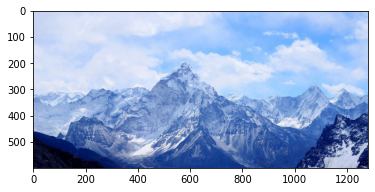

In [ ]:
plt.imshow(image_file)
plt.show()

In [ ]:
image_file.shape

(600, 1280, 3)

In [ ]:
np.product(image_file.shape)

2304000

In [ ]:
image_file_layer1 = image_file[:,:,0]  # SVD cannot be used on a 3D array. So, 2D arrays are required to be extracted first

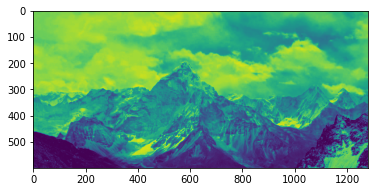

In [ ]:
plt.imshow(image_file_layer1)

In [ ]:
u,s,v = np.linalg.svd(image_file_layer1, full_matrices=False)

In [ ]:
u.shape, v.shape, s.shape

((600, 600), (600, 1280), (600,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

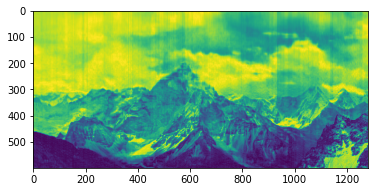

In [ ]:
K = 100
new_image_layer1 = (u[:,:K].dot(np.diag(s[:K]))).dot(v[:K,:])
new_image_layer1 = scaler.fit_transform(new_image_layer1)
plt.imshow(new_image_layer1)
plt.show()

0.0 1.0
0.0 1.0
0.0 1.0


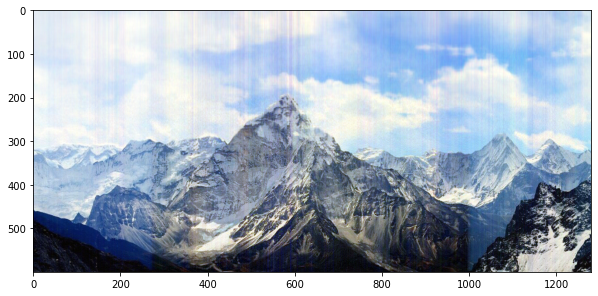

In [ ]:
final_image = np.zeros(shape=image_file.shape)
K = 200
for layer in range(3):
  u,s,v = np.linalg.svd(image_file[:,:,layer], full_matrices=False)
  Z = (u[:,:K].dot(np.diag(s[:K]))).dot(v[:K,:])
  Z = scaler.fit_transform(Z)
  Z = np.round(Z,2)
  print(Z.min(), Z.max())
  final_image[:,:,layer] = Z
plt.figure(figsize=(10,5))
plt.imshow(final_image)
plt.show() # Vertical lines are appearing, probably, due to rounding off error.

In [ ]:
(200*600 + 1280*200)*3 + 200

1128200

In [ ]:
(2304000 - 1128200)/2304000

0.5103298611111111